<a href="https://colab.research.google.com/github/Gilf641/EVA4/blob/master/S9-V2/Q9_QuizDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from datetime import datetime
print("Current Date/Time: ", datetime.now())


Current Date/Time:  2020-05-30 14:06:13.712227


**Mount the Drive**

In [0]:
# mount the drive 
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [0]:
# add path to our library in default search path
import sys
sys.path.append('/content/drive/My Drive/EVA4/Quiz9/evaLibrary')

**Load required libraries**

In [0]:
import image_transformations
import numpy as np
from torchvision import transforms
import torchvision
import DataLoaders as loader
import displayData as display
import quizNet as quizdnn
import execute

**Image Transformations**

In [0]:

channel_means = (0.5, 0.5, 0.5)
channel_stdevs = (0.5, 0.5, 0.5)
trans = image_transformations.Transforms(normalize=True, mean=channel_means, stdev=channel_stdevs)

train_transform = trans.train_transforms()
test_transform = trans.test_transforms()
                                       

**Load the Train & Test Dataset**

In [0]:

train = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = train_transform)


test = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = test_transform)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [0]:
dl = loader.DataLoaders()
trainLoader = dl.dataLoader(train)
testLoader = dl.dataLoader(test)


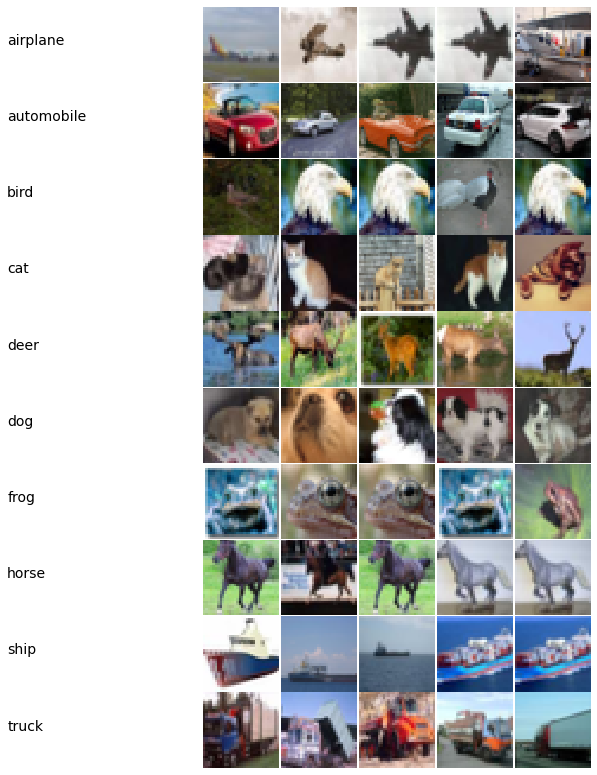

In [0]:
display.classImages(trainLoader)

In [0]:
# Model Summary

!pip install torchsummary
from torchsummary import summary

import torch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print('Device set to', device)
model = quizdnn.quizNet(False).to(device)
summary(model, input_size=(3, 32, 32))


Device set to cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
         MaxPool2d-9           [-1, 32, 16, 16]               0
           Conv2d-10           [-1, 16, 16, 16]             512
             ReLU-11           [-1, 16, 16, 16]               0
      BatchNorm2d-12           [-1, 16, 16, 16]              32
          Dropout-13           [-1, 16, 16, 16]               0
           Conv2d-14

In [0]:
import execute # this is to train & test the model
incorrectSamples = []
model = quizdnn.quizNet(False).to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainLoader), epochs=15)

model1 = execute.Test_Train()
EPOCHS = 15
for epoch in range(1,EPOCHS+1):
  print("EPOCH:", epoch)
  model1.train(model, device, trainLoader, optimizer, epoch, scheduler, L1lambda=1e-5)
  model1.test(model, device, testLoader, "model.pt", incorrectSamples)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.4361926317214966 Batch_id=390 Accuracy=43.46: 100%|██████████| 391/391 [00:13<00:00, 29.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 1.3530).  Saving model ...

Test set: Average loss: 1.3530, Accuracy: 4989/10000 (49.89%)

EPOCH: 2


Loss=1.0780318975448608 Batch_id=390 Accuracy=60.03: 100%|██████████| 391/391 [00:12<00:00, 30.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (1.3530 --> 1.0466).  Saving model ...

Test set: Average loss: 1.0466, Accuracy: 6234/10000 (62.34%)

EPOCH: 3


Loss=0.7193012833595276 Batch_id=390 Accuracy=66.53: 100%|██████████| 391/391 [00:13<00:00, 30.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (1.0466 --> 0.9248).  Saving model ...

Test set: Average loss: 0.9248, Accuracy: 6711/10000 (67.11%)

EPOCH: 4


Loss=1.085598111152649 Batch_id=390 Accuracy=70.86: 100%|██████████| 391/391 [00:12<00:00, 30.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.9248 --> 0.7937).  Saving model ...

Test set: Average loss: 0.7937, Accuracy: 7231/10000 (72.31%)

EPOCH: 5


Loss=0.7455647587776184 Batch_id=390 Accuracy=73.98: 100%|██████████| 391/391 [00:12<00:00, 30.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.7937 --> 0.7370).  Saving model ...

Test set: Average loss: 0.7370, Accuracy: 7414/10000 (74.14%)

EPOCH: 6


Loss=0.8376885652542114 Batch_id=390 Accuracy=75.79: 100%|██████████| 391/391 [00:12<00:00, 31.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.7370 --> 0.6646).  Saving model ...

Test set: Average loss: 0.6646, Accuracy: 7719/10000 (77.19%)

EPOCH: 7


Loss=0.8716904520988464 Batch_id=390 Accuracy=77.29: 100%|██████████| 391/391 [00:12<00:00, 31.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.6646 --> 0.6618).  Saving model ...

Test set: Average loss: 0.6618, Accuracy: 7690/10000 (76.90%)

EPOCH: 8


Loss=0.8016716837882996 Batch_id=390 Accuracy=78.34: 100%|██████████| 391/391 [00:12<00:00, 30.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6665, Accuracy: 7652/10000 (76.52%)

EPOCH: 9


Loss=0.9226767420768738 Batch_id=390 Accuracy=79.29: 100%|██████████| 391/391 [00:12<00:00, 30.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.6618 --> 0.6155).  Saving model ...

Test set: Average loss: 0.6155, Accuracy: 7885/10000 (78.85%)

EPOCH: 10


Loss=0.5014947056770325 Batch_id=390 Accuracy=80.38: 100%|██████████| 391/391 [00:12<00:00, 31.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6296, Accuracy: 7821/10000 (78.21%)

EPOCH: 11


Loss=0.495486319065094 Batch_id=390 Accuracy=81.45: 100%|██████████| 391/391 [00:12<00:00, 30.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.6155 --> 0.5694).  Saving model ...

Test set: Average loss: 0.5694, Accuracy: 8022/10000 (80.22%)

EPOCH: 12


Loss=0.4415884017944336 Batch_id=390 Accuracy=82.79: 100%|██████████| 391/391 [00:12<00:00, 30.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.5694 --> 0.5467).  Saving model ...

Test set: Average loss: 0.5467, Accuracy: 8139/10000 (81.39%)

EPOCH: 13


Loss=0.4352966845035553 Batch_id=390 Accuracy=83.96: 100%|██████████| 391/391 [00:12<00:00, 31.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.5467 --> 0.5431).  Saving model ...

Test set: Average loss: 0.5431, Accuracy: 8147/10000 (81.47%)

EPOCH: 14


Loss=0.4775162935256958 Batch_id=390 Accuracy=85.43: 100%|██████████| 391/391 [00:12<00:00, 31.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.5431 --> 0.5039).  Saving model ...

Test set: Average loss: 0.5039, Accuracy: 8264/10000 (82.64%)

EPOCH: 15


Loss=0.37811166048049927 Batch_id=390 Accuracy=86.14: 100%|██████████| 391/391 [00:12<00:00, 31.44it/s]


Validation loss has  decreased (0.5039 --> 0.4987).  Saving model ...

Test set: Average loss: 0.4987, Accuracy: 8323/10000 (83.23%)



Text(0.5, 1.0, 'Test Accuracy')

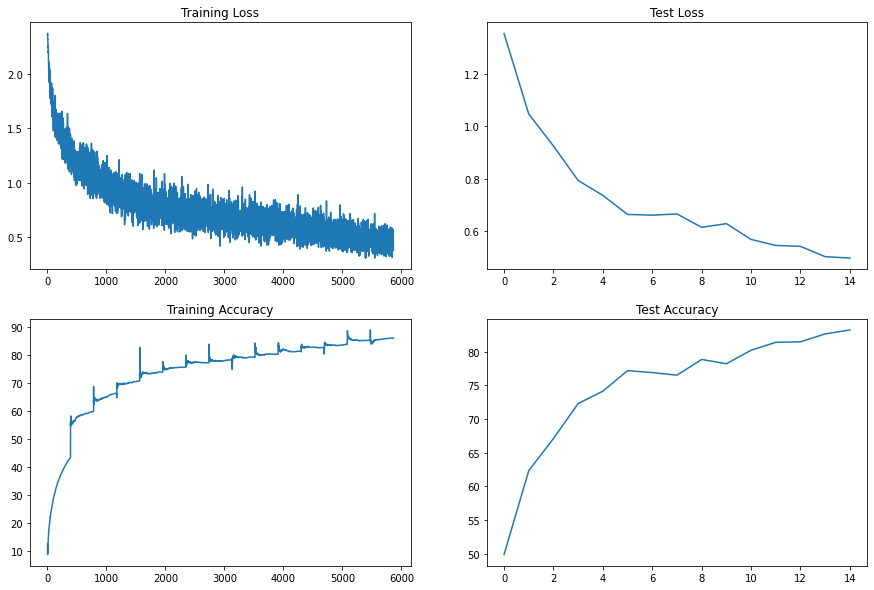

In [0]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(model1.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(model1.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(model1.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(model1.test_acc)
axs[1, 1].set_title("Test Accuracy")